Number of variables:  6
Number of terms in HUBO:  9
Number of terms in QUBO:  62
Variables: [(1, 2, 1), (0, 2, 1), (0, 1, 0), (1, 2, 0), (0, 2, 0), (0, 1, 1)]
Step:  0 Cost:  0.1206504211215692
Step:  100 Cost:  -5.0302079061030724
Solution probability:  0.035774646395049264
First excited state probability:  0.03568271301130293


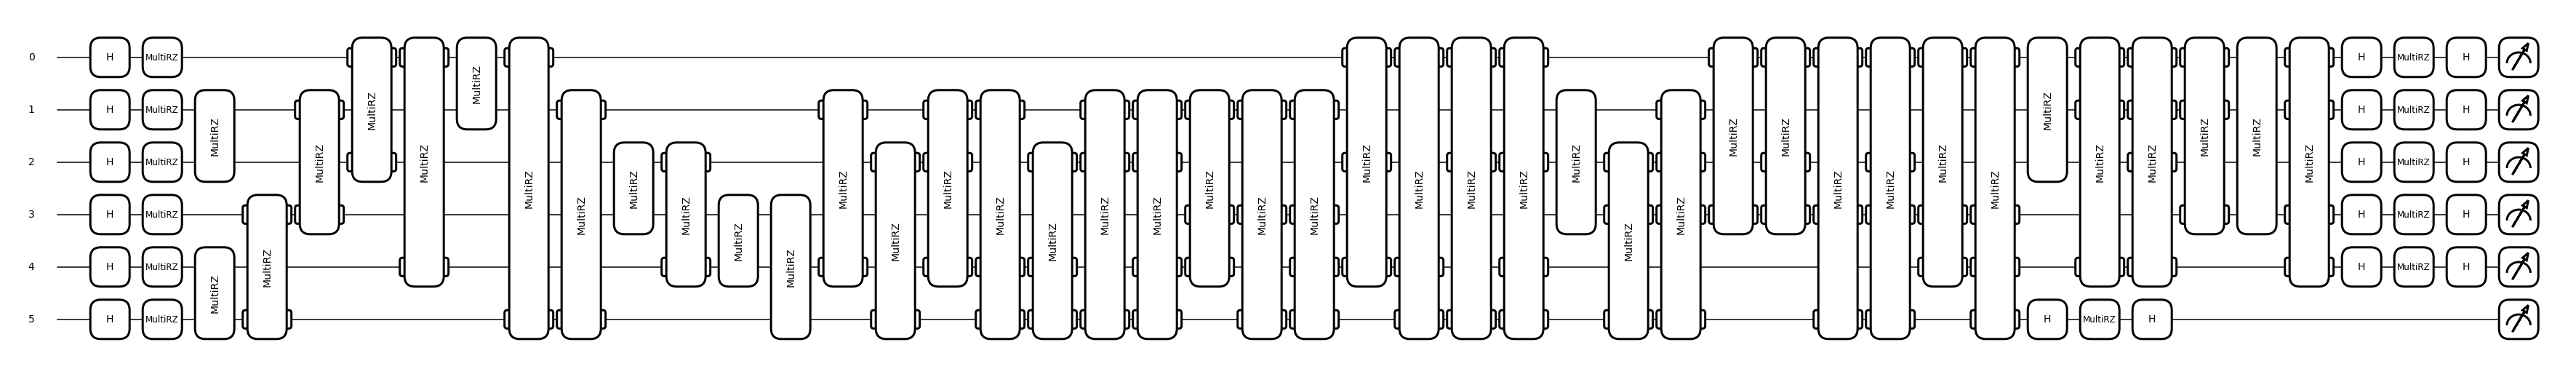

In [1]:
import numpy as np
from query_graphs.query_graphs import QueryGraphs
from QJoin import QJoin
from solver import Solver

graph_constructors = QueryGraphs()

graph = "clique"
method_name = "precise"
min_n_nodes = 3
max_n_nodes = 3
solver_name = "qaoa_pennylane"
hubo_to_bqm_strengths = [0, 0, 0, 2, 2, 2, 2, 3]
scalers = [0, 0, 0, 2, 2, 2, 2, 8]

if graph == "clique":
    # Exact 3 - 4
    # Gurobi 3 - 5
    query_graphs = [graph_constructors.clique(i) for i in range(min_n_nodes, max_n_nodes + 1)]
elif graph == "star":
    # Exact 3 - 5
    # Gurobi 3 - 7
    query_graphs = [graph_constructors.star(i) for i in range(min_n_nodes, max_n_nodes + 1)]
elif graph == "chain":
    # Exact 3 - 6
    # Gurobi 3 - 12
    query_graphs = [graph_constructors.chain(i) for i in range(min_n_nodes, max_n_nodes + 1)]
elif graph == "cycle":
    # Exact 3 - 5
    # Gurobi 3 - 9
    query_graphs = [graph_constructors.cycles(i) for i in range(min_n_nodes, max_n_nodes + 1)]
elif graph == "tree":
    # Exact 3 - 6
    # Gurobi 3 - 9
    query_graphs = [graph_constructors.tree(i) for i in range(min_n_nodes, max_n_nodes + 1)]

i = min_n_nodes
for query_graph in query_graphs:
    
    hubo_to_bqm_strength = hubo_to_bqm_strengths[i]
    scaler = scalers[i]
    
    experiment_name = "results//" + method_name + "//" + solver_name + "//" + solver_name + "_" +\
        graph + "_" + str(i) + "_" + str(scaler) + "_" +\
        str(hubo_to_bqm_strength)
    
    qjoin = QJoin(query_graph, scaler, hubo_to_bqm_strength)
    #qjoin.draw_query_graph(experiment_name + ".png")
    solver = Solver(qjoin, experiment_name + ".json")
    solver.solve(solver_name)
    i += 1